## Importing Necessary Libraries

In [14]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.multioutput import MultiOutputClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report, hamming_loss

## Load the Dataset

In [15]:
start = time.time()
# Provide the correct path to your dataset
data_df = pd.read_csv(r'C:\Users\Kshitish Pandit\Desktop\Chess\Data1.csv')

# Define target columns and features
target_columns = ['Rated_(T/F)', 'Game_Status', 'Winner']
X = data_df.drop(columns=target_columns)
y = data_df[target_columns]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Preprocessing: Scaling Features

In [16]:
# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Dimensionality Reduction Using PCA

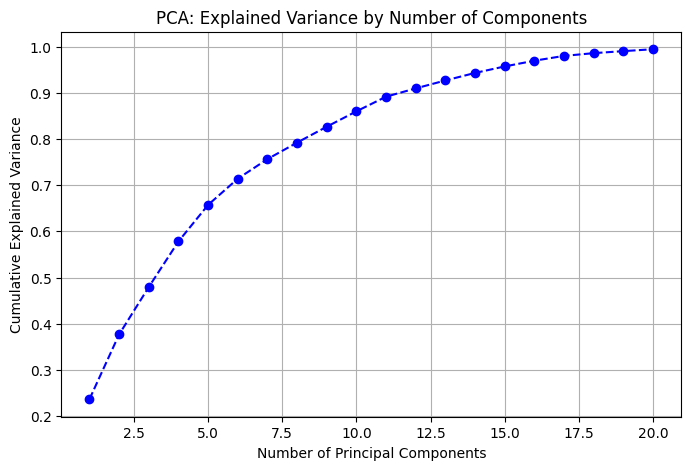

In [17]:
# PCA for dimensionality reduction
n_components = min(X_train_scaled.shape[1], 20)
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Plot cumulative explained variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)
plt.figure(figsize=(8, 5))
plt.plot(range(1, n_components + 1), cumulative_variance, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA: Explained Variance by Number of Components')
plt.grid(True)
plt.show()

## Define and Evaluate Models

In [18]:
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression model
lr = LogisticRegression(max_iter=1000, random_state=42)

# Wrap with MultiOutputClassifier
multi_output_model_lr = MultiOutputClassifier(lr, n_jobs=-1)

# Fit and predict
multi_output_model_lr.fit(X_train_scaled, y_train)
y_pred_lr = multi_output_model_lr.predict(X_test_scaled)

# Print classification report
for i, target in enumerate(target_columns):
    print(f"\nTarget: {target}")
    print(classification_report(y_test.iloc[:, i], y_pred_lr[:, i]))



Target: Rated_(T/F)
              precision    recall  f1-score   support

       right       0.82      0.99      0.90      1431
       wrong       0.35      0.02      0.04       314

    accuracy                           0.82      1745
   macro avg       0.59      0.51      0.47      1745
weighted avg       0.74      0.82      0.74      1745


Target: Game_Status
              precision    recall  f1-score   support

        draw       0.50      0.05      0.08        66
        mate       0.47      0.24      0.32       526
   outoftime       0.55      0.41      0.47       146
      resign       0.64      0.86      0.73      1007

    accuracy                           0.61      1745
   macro avg       0.54      0.39      0.40      1745
weighted avg       0.57      0.61      0.56      1745


Target: Winner
              precision    recall  f1-score   support

       black       0.63      0.54      0.58       803
        draw       0.50      0.07      0.12        71
       white     

In [19]:
# Import necessary libraries
from sklearn.model_selection import cross_val_score
from sklearn.multioutput import MultiOutputClassifier

# Define models to test
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "SVM (Linear)": SVC(kernel='linear', probability=True, random_state=42)
}

# Evaluate models using cross-validation
model_scores = {}
for model_name, model in models.items():
    # Wrap the model with MultiOutputClassifier
    multi_output_model = MultiOutputClassifier(model, n_jobs=-1)
    
    # Perform cross-validation
    scores = cross_val_score(multi_output_model, X_train_scaled, y_train, cv=5, scoring='accuracy')
    
    # Store the mean score for each model
    model_scores[model_name] = scores.mean()
    print(f"Model: {model_name} | Mean Accuracy: {scores.mean():.4f}")

# Remove the two lowest-scoring models based on accuracy
lowest_models = sorted(model_scores, key=model_scores.get)[:2]
for model in lowest_models:
    models.pop(model)
    print(f"Removed {model} due to low performance.")


c:\Users\Kshitish Pandit\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Kshitish Pandit\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 139, in __call__
    score = scorer._score(
        cached_call, estimator, *args, **routed_params.get(name).score
    )
  File "c:\Users\Kshitish Pandit\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Kshitish Pandit\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)


Model: Logistic Regression | Mean Accuracy: nan


c:\Users\Kshitish Pandit\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Kshitish Pandit\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 139, in __call__
    score = scorer._score(
        cached_call, estimator, *args, **routed_params.get(name).score
    )
  File "c:\Users\Kshitish Pandit\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Kshitish Pandit\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)


Model: Random Forest | Mean Accuracy: nan


c:\Users\Kshitish Pandit\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Kshitish Pandit\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 139, in __call__
    score = scorer._score(
        cached_call, estimator, *args, **routed_params.get(name).score
    )
  File "c:\Users\Kshitish Pandit\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Kshitish Pandit\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)


Model: Gradient Boosting | Mean Accuracy: nan


c:\Users\Kshitish Pandit\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Kshitish Pandit\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 139, in __call__
    score = scorer._score(
        cached_call, estimator, *args, **routed_params.get(name).score
    )
  File "c:\Users\Kshitish Pandit\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Kshitish Pandit\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)


Model: SVM (Linear) | Mean Accuracy: nan
Removed Logistic Regression due to low performance.
Removed Random Forest due to low performance.


c:\Users\Kshitish Pandit\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Kshitish Pandit\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 139, in __call__
    score = scorer._score(
        cached_call, estimator, *args, **routed_params.get(name).score
    )
  File "c:\Users\Kshitish Pandit\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Kshitish Pandit\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)


In [20]:
end = time.time()
print(end - start)

306.71617674827576
